In [29]:
# Library Import
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib as mpl
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from scipy import stats
import collections

In [95]:
# Define a path for iterative import of TCGA dataset (GBM)
mypath="C:/Graduate school/Spring22/20.440/gdc_download_20220405_034243.083206"

In [96]:
# Read in all beta value files from a directory (TCGA-GBM) 
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(mypath):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames if 'level3betas' in file]

In [97]:
# Process and concatenate all GBM table
table= pd.read_csv(listOfFiles[0], sep="\t",engine='python',header=None)
for i in range(1,len(listOfFiles)):
    element=pd.read_csv(listOfFiles[i], sep="\t",engine='python',header=None)
    table[str(i+1)]=element.iloc[:,1]

In [92]:
control_table=pd.read_csv('GSE15745-GPL8490_series_matrix.txt',sep='\t',skiprows=97, header=None, engine='python')
control_table=control_table.iloc[0:len(control_table)-1,:]
print(control_table)

              0         1         2         3         4         5         6    \
0      cg00000292  0.585240  0.504443  0.666428  0.615710  0.621424  0.598820   
1      cg00002426  0.060864  0.035139  0.040410  0.051323  0.071662  0.047843   
2      cg00003994  0.019830  0.021034  0.025200  0.018763  0.017982  0.018902   
3      cg00005847  0.075674  0.129247  0.084598  0.096018  0.100306  0.076371   
4      cg00006414  0.024402  0.031553  0.022090  0.025632  0.029686  0.030087   
...           ...       ...       ...       ...       ...       ...       ...   
27573  cg27657283  0.017546  0.021149  0.014054  0.017931  0.022780  0.015954   
27574  cg27661264  0.357656  0.378151  0.333035  0.341311  0.368154  0.325764   
27575  cg27662379  0.008241  0.012510  0.006423  0.009806  0.011541  0.007528   
27576  cg27662877  0.021604  0.030937  0.016157  0.022732  0.032010  0.018286   
27577  cg27665659  0.018465  0.025984  0.018917  0.026751  0.023681  0.024919   

            7         8    

In [6]:
test_table=pd.read_csv('GSE60274_series_matrix.txt',sep='\t',skiprows=76, header=0, engine='python')
test_table=test_table.iloc[0:len(test_table)-1,:]
display(test_table)

,ID_REF,GSM1468969,GSM1468970,GSM1468971,GSM1468972,GSM1468973,GSM1468974,GSM1468975,GSM1468976,GSM1468977,...,GSM1469036,GSM1469037,GSM1469038,GSM1469039,GSM1469040,GSM1469041,GSM1469042,GSM1469043,GSM1469044,GSM1469045
0,cg00000029,0.703077,0.617882,0.532867,0.613374,0.526557,0.229842,0.402038,0.266010,0.602932,...,0.593226,0.528574,0.496524,0.751308,0.835188,0.847892,0.566944,0.692681,0.522476,0.595234
1,cg00000108,0.905084,0.920447,0.920417,0.907320,0.935258,0.908327,0.919530,0.915942,0.912841,...,0.873776,0.888175,0.928360,0.904031,0.925782,0.931041,0.860057,0.913821,0.900688,0.908686
2,cg00000109,0.700868,0.760127,0.746597,0.756437,0.925813,0.765639,0.909356,0.864399,0.855356,...,0.819582,0.791521,0.910664,0.906467,0.899654,0.922136,0.804268,0.727817,0.894534,0.843792
3,cg00000165,0.798347,0.340717,0.232317,0.567511,0.901935,0.858373,0.508983,0.646213,0.624028,...,0.195909,0.189334,0.905372,0.871282,0.872410,0.909141,0.576990,0.593926,0.619065,0.853154
4,cg00000236,0.820175,0.854848,0.829725,0.831890,0.890153,0.827540,0.810773,0.831763,0.813206,...,0.851761,0.861304,0.888872,0.897924,0.890879,0.831062,0.847385,0.886417,0.821921,0.859647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs9363764,0.932945,0.516742,0.517643,0.517648,0.054314,0.922264,0.523473,0.062938,0.512976,...,0.055548,0.068100,0.088428,0.418577,0.530390,0.923243,0.069940,0.529400,0.523827,0.942172
485573,rs939290,0.525365,0.044385,0.043544,0.544598,0.553385,0.048834,0.537200,0.965481,0.043794,...,0.531173,0.543349,0.531030,0.035511,0.542513,0.044125,0.543130,0.050488,0.540664,0.044210
485574,rs951295,0.949391,0.070560,0.486041,0.524672,0.076921,0.070700,0.936853,0.929233,0.514117,...,0.521668,0.065171,0.053724,0.938004,0.523332,0.058762,0.314662,0.936790,0.520436,0.055299
485575,rs966367,0.502314,0.523063,0.459802,0.054332,0.526718,0.511772,0.931548,0.483232,0.059644,...,0.941378,0.039041,0.523020,0.064296,0.524312,0.515957,0.507919,0.052833,0.527323,0.524422


In [11]:
# Index the matrix by the methylation CpG site ID
table_reindex=table.set_index(0)
control_table_reindex=control_table.set_index(0)
test_table_reindex=test_table.set_index('ID_REF')

In [12]:
# Drop NA values of dataset and keep the common CpG sites shared between all datasets
GBM_final=table_reindex.sort_index()
control_final=control_table_reindex.sort_index()
test_final=test_table_reindex.sort_index()
GBM_nona=GBM_final.dropna()
control_nona=control_final.dropna()
test_nona=test_final.dropna()
common_index=list(set(GBM_nona.index)&set(control_nona.index)&set(test_nona.index))
GBM_final.to_csv('GBM_table.csv')
control_final.to_csv('control_table.csv')
test_final.to_csv('test_table.csv')

In [98]:
# Take the common CpG sites of all datasets
GBM_total_nona=GBM_nona.loc[common_index,:]
control_total_nona=control_nona.loc[common_index,:]
test_total_nona=test_nona.loc[common_index,:]

KeyboardInterrupt: 

In [99]:
# Rename samples by its label (identity)
GBM_name=dict()
for i in range(0,len(GBM_total_nona.columns)):
    GBM_name[GBM_total_nona.columns[i]]='GBM'+str(i+1)
control_name=dict()
for i in range(0,len(control_total_nona.columns)):
    control_name[control_total_nona.columns[i]]='Control'+str(i+1)
test_name=dict()
# test_total_nona=test_total_nona.drop(['GSM1469038','GSM1469039','GSM1469040','GSM1469041'],axis=1)
for i in range(0,len(test_total_nona.columns)):
    if test_total_nona.columns[i] in ['GSM1469033','GSM1469034','GSM1469035','GSM1469036','GSM1469037']:
        test_name[test_total_nona.columns[i]]='Control'+str(i+1+len(control_total_nona.columns))
    else:
        test_name[test_total_nona.columns[i]]='GBM'+str(i+1+len(GBM_total_nona.columns))

In [101]:
# Rename the matrix
GBM_renamed=GBM_total_nona.rename(columns=GBM_name)
control_renamed=control_total_nona.rename(columns=control_name)
test_renamed=test_total_nona.rename(columns=test_name)

In [102]:
# Output final processed data. This can be directly loaded in the future
control_renamed.to_csv('control_table_noNa_final.csv')
GBM_renamed.to_csv('GBM_table_noNa_final.csv')
test_renamed.to_csv('test_table_noNa_final.csv')

# This section runs the code for processed data matrix

In [9]:
#Load data
# Control: GSE15745, GBM: TCGA-GBM, Test: GSE60274
control_renamed=pd.read_csv('control_table_noNa_final.csv',index_col=0,engine='python')
GBM_renamed=pd.read_csv('GBM_table_noNa_final.csv',index_col=0,engine='python')
test_renamed=pd.read_csv('test_table_noNa_final.csv',index_col=0,engine='python')

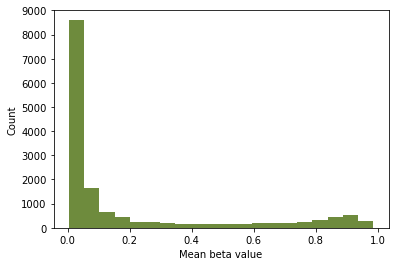

In [128]:
# Plot global distribution of methylation for control and GBM samples
plt.hist(control_renamed.mean(axis=1),bins=20,color='#6E8B3D')
plt.xlabel('Mean beta value')
plt.ylim(0, 9000)
plt.ylabel('Count')
plt.show()

In [11]:
# Agglomerative clustering of samples, labels shown as bar below
# Input: matrix containing beta values of all samples and their labels
# Output: dendrogram with labeled bar
def plot_dendrogram(feature_matrix,target):
    distance=pdist(feature_matrix,'euclidean')
    Z=linkage(distance,'average')
    fig=plt.figure(figsize = (15,6))
    dn=dendrogram(Z,labels=target,leaf_rotation=90)
    plt.show()
    fig, ax = plt.subplots()
    fig.set_figheight(2)
    fig.set_figwidth(15)
    if len(set(target))==2:
        cmap = mpl.colors.ListedColormap(['#6E8B3D','#CD3333'])
        bounds = [-0.5,0.5,1.5]
    else:
        cmap = mpl.colors.ListedColormap(['#6E8B3D','#CD3333','#53868B'])
        bounds = [-0.5,0.5,1.5,2.5]
    
    points = [dn['ivl'] for i in range(100)]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(points, cmap=cmap, norm=norm)
    plt.show()
    return(dn['ivl'])

In [12]:
# Create joint table of all dataset and training dataset
total_table1=control_renamed.join(GBM_renamed)
total_table2=total_table1.join(test_renamed)

In [13]:
# Create labels for the matrix and combine them together
GBM_label=[0]*len(total_table2.columns)
GBM_label2=[0]*len(total_table1.columns)
GBM_label_test=[0]*len(test_renamed.columns)
matrix_label=[0]*len(control_renamed.columns)+[1]*len(GBM_renamed.columns)+[2]*len(test_renamed.columns)
for i in range(0,len(total_table2.columns)):
    if 'GBM' in total_table2.columns[i]:
        GBM_label[i]=1
    elif 'Control' in total_table2.columns[i]:
        GBM_label[i]=0
for i in range(0,len(total_table1.columns)):
    if 'GBM' in total_table1.columns[i]:
        GBM_label2[i]=1
    elif 'Control' in total_table1.columns[i]:
        GBM_label2[i]=0
for i in range(0,len(test_renamed.columns)):
    if 'GBM' in test_renamed.columns[i]:
        GBM_label_test[i]=1
    elif 'Control' in test_renamed.columns[i]:
        GBM_label_test[i]=0

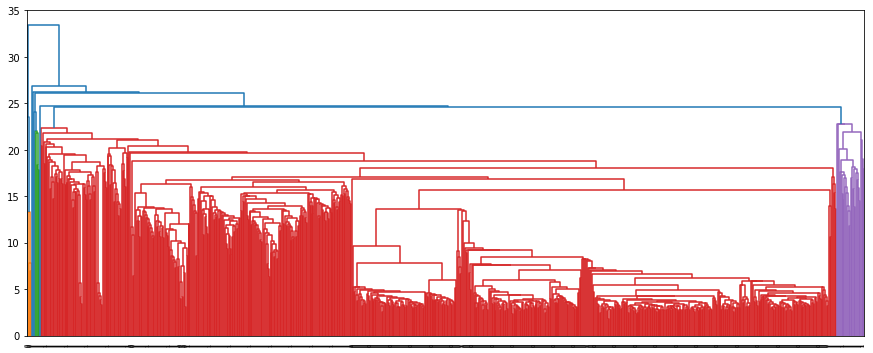

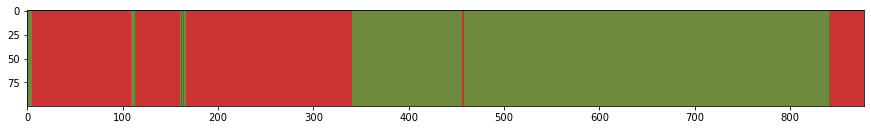

In [14]:
# Agglomerative clustering of samples by label
# Red: GBM, Green: Control
GBM_culster=plot_dendrogram(total_table2.T,GBM_label)

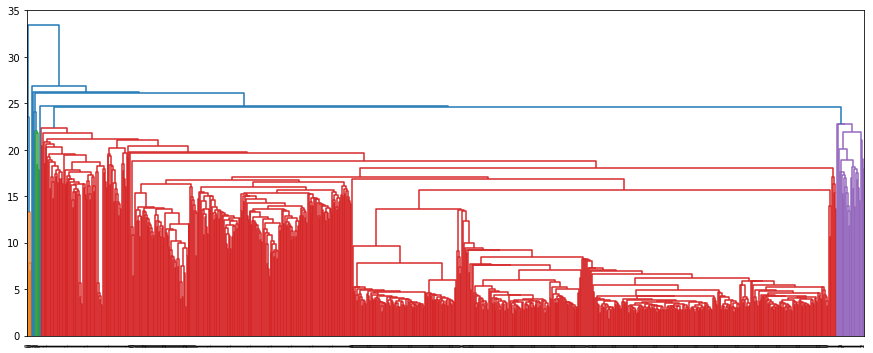

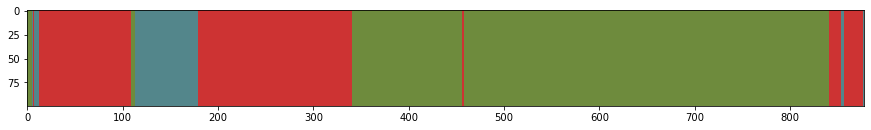

In [15]:
# Clustering of samples and label by datasets
# Red: GBM, green:Control, Blue: test
# Samples don't cluster by dataset (between sample variance is not too big)
Sample_cluster=plot_dendrogram(total_table2.T,matrix_label)

In [16]:
# PCA analysis of data
# Standardize the values for each selected feature and perform PCA
def PCAanalysis(x):
    X=preprocessing.StandardScaler().fit_transform(x)
    pca = PCA()
    pca.fit(X)
    print(pca.n_components_)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC'+str(i) for i in range(1,pca.n_components_+1)])
    loading_matrix=pca.components_
    return(principalDf,loading_matrix,pca.explained_variance_ratio_)


In [133]:
# This block adds the name of donors on each point
# Input result is the 'y variable' with donors as row labels
# If uncomment block, plot feature loadings on current x and y axis PCs
def plotPCA(principalDf,selected_feature,loading_matrix,explained_variance):
    for i in range(0,len(principalDf.columns.values)-2):
        for j in range(i+1, len(principalDf.columns.values)-1):
            fig = plt.figure(figsize = (8,8))
            ax = fig.add_subplot(1,1,1) 
            ax.set_xlabel('PC'+str(i+1)+'('+str(round(explained_variance[i]*100,2))+'%)', fontsize = 20)
            ax.set_ylabel('PC'+str(j+1)+'('+str(round(explained_variance[j]*100,2))+'%)', fontsize = 20)
            principalDf_sort=principalDf.sort_values('target',axis=0,ascending=True)
            targets = principalDf_sort['target'].values
            color_list={0:'#6E8B3D',1:'#CD3333'}
            colors = [color_list[c] for c in targets]
            sc = ax.scatter(principalDf_sort.loc[:,'PC'+str(i+1)], principalDf_sort.loc[:,'PC'+str(j+1)], c=colors)
            plt.savefig(str(i)+str(j)+'.jpg')
            plt.show()

In [18]:
# Run PCA analysis on all features in the training dataset
[principalDf2, loading_matrix,explained_variance]=PCAanalysis(total_table1.T)

801


In [19]:
# This is the master run script for visualizing PCA analysis
# Calls PCAanalysis and PlotPCA functions
# feature_matrix: a matrix of physical features to run PCA on, result: label values, name: name of the label used
def PCAmasterrun(principalDf2, loading_matrix,explained_variance,feature_matrix,result):
#     [principalDf2, loading_matrix,explained_variance]=PCAanalysis(feature_matrix)
    plt.figure(figsize=(8,4))
    plt.bar(['PC'+ str(i) for i in range(1,7)],explained_variance[0:6],color='#5F9EA0')
    plt.ylabel('Explained Variance')
    plt.show()
    for i in range(0,len(explained_variance)):
        if sum(explained_variance[0:i+1])>0.8:
            count=i
            break
    principalDf_trimmed=principalDf2.iloc[:,0:6]
    principalDf_trimmed['target']=np.array(result)
    principalDf_trimmed.index=feature_matrix.index
    loading_matrix_trimmed=loading_matrix[:,0:6]
    plotPCA(principalDf_trimmed,feature_matrix.columns.values,loading_matrix_trimmed,explained_variance)

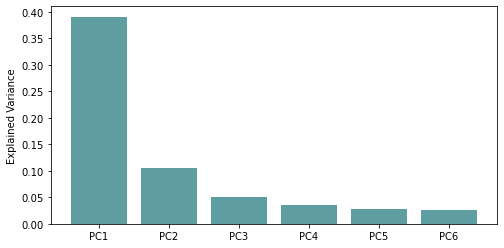

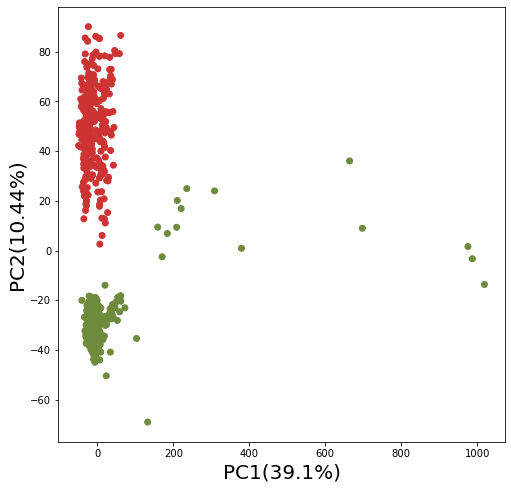

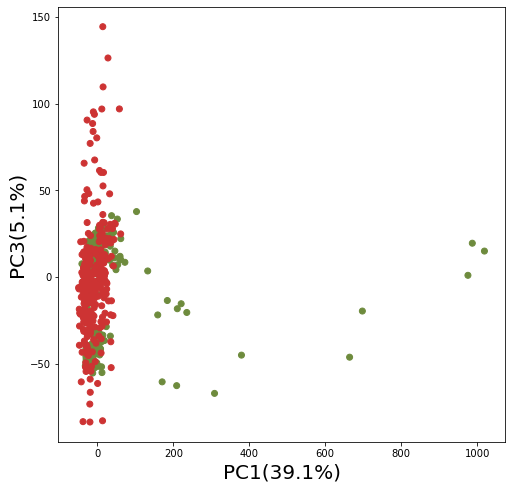

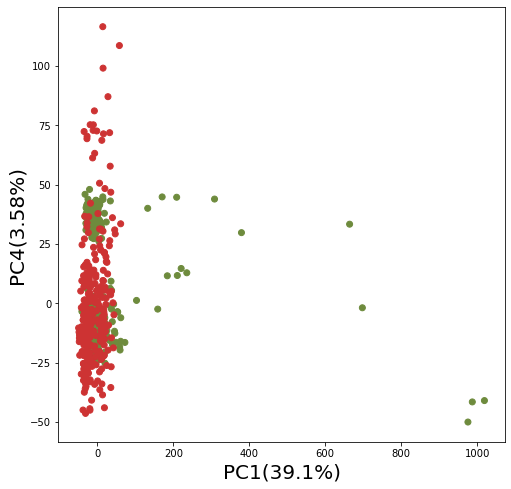

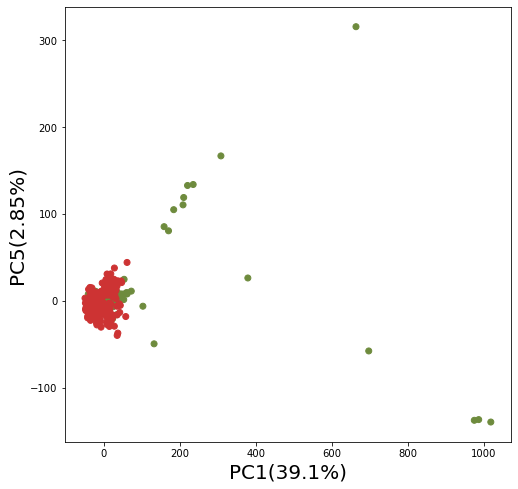

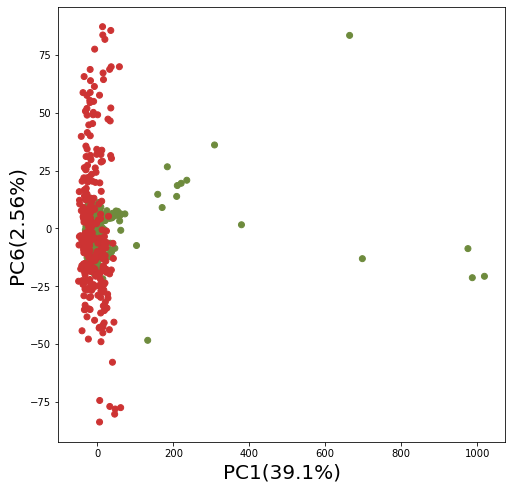

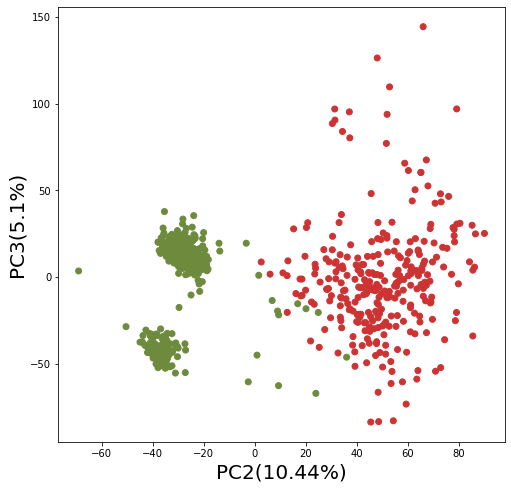

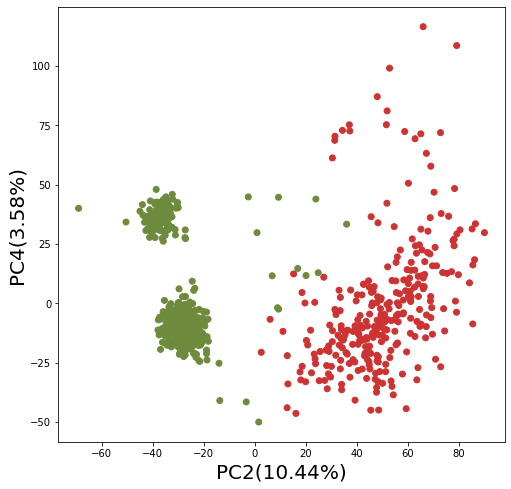

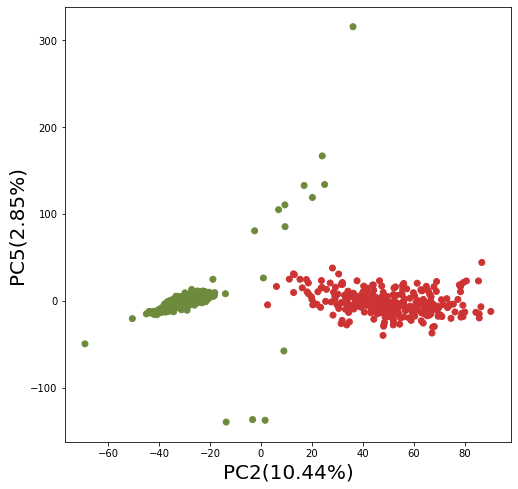

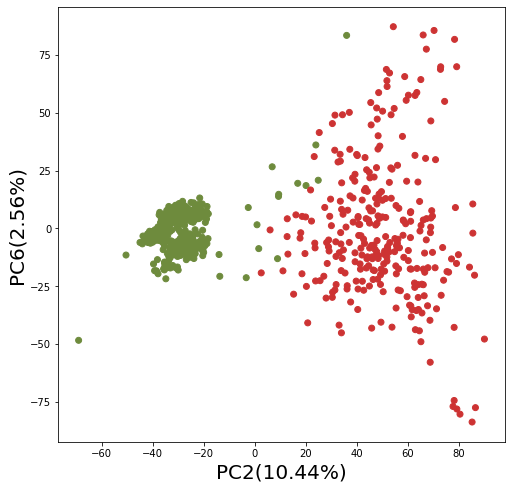

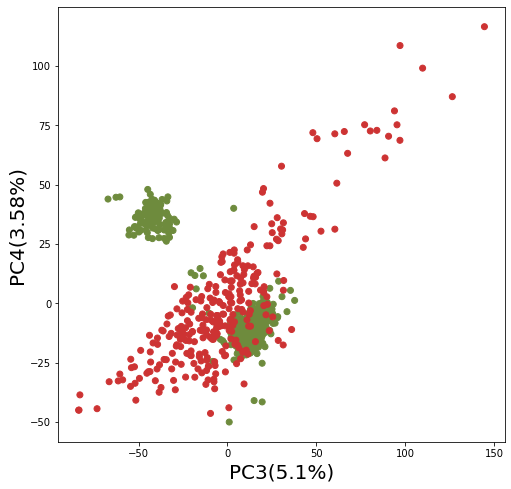

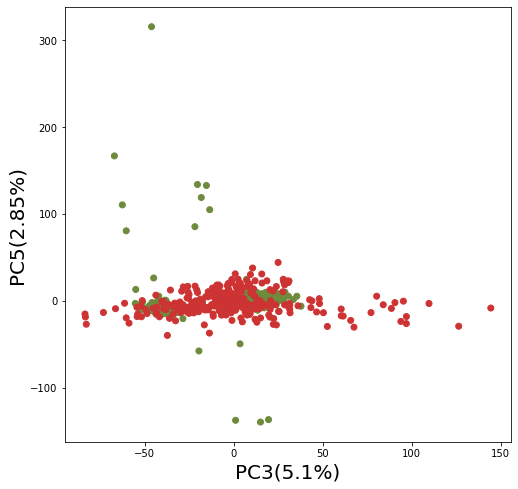

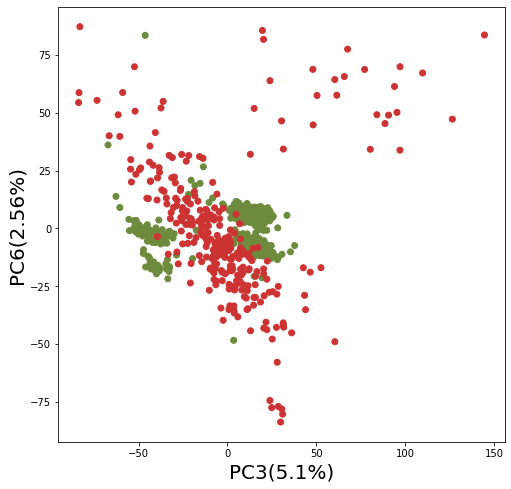

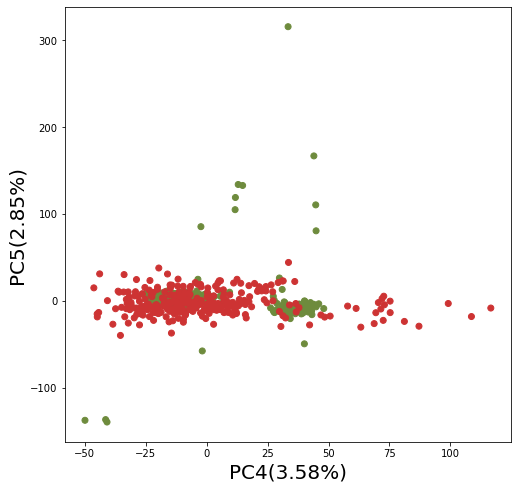

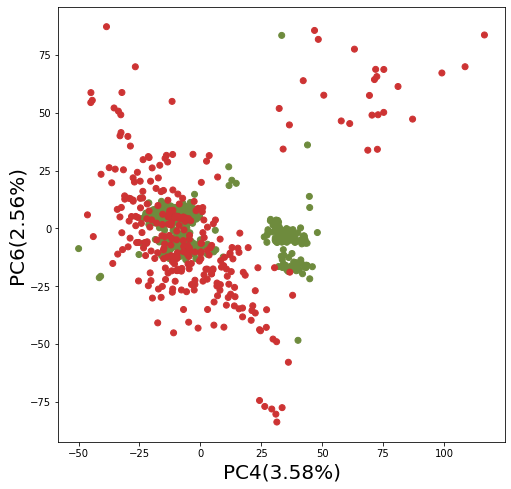

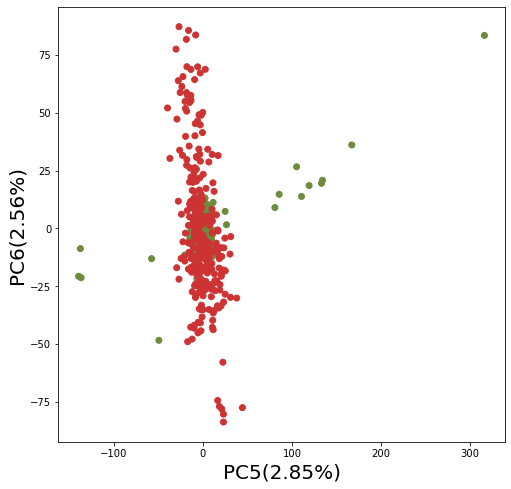

In [134]:
# Plot score plots for all feature PCA in the training set
PCAmasterrun(principalDf2, loading_matrix,explained_variance,total_table1.T,GBM_label2)

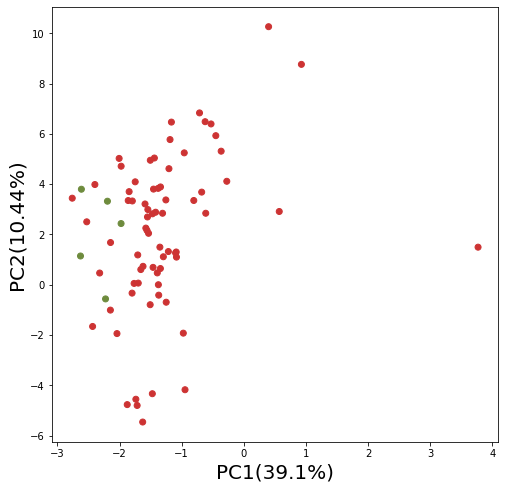

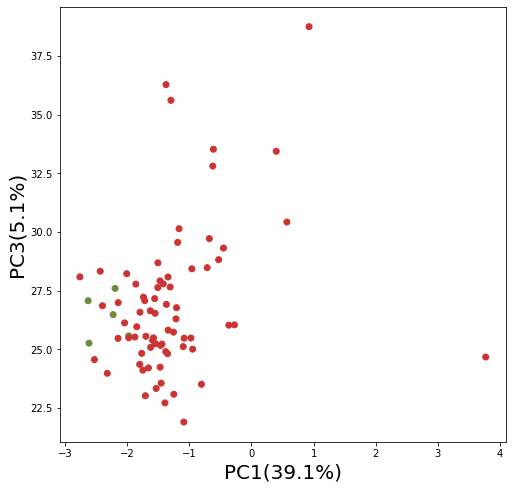

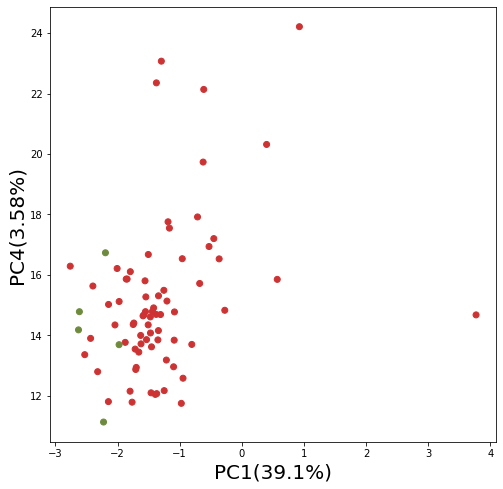

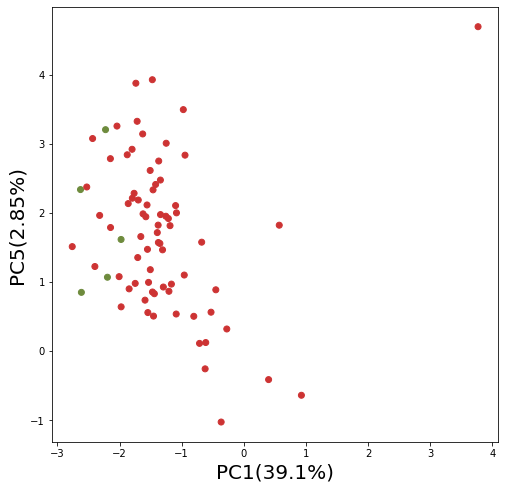

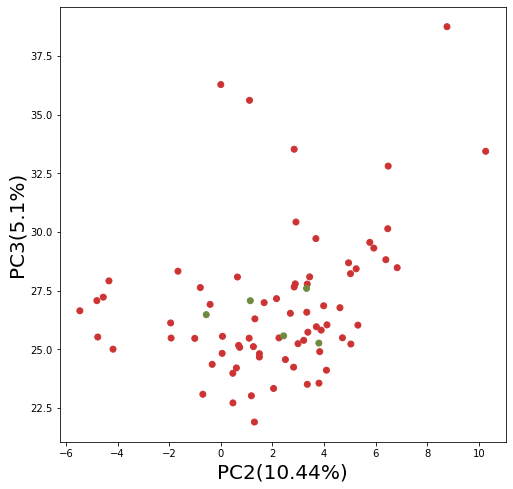

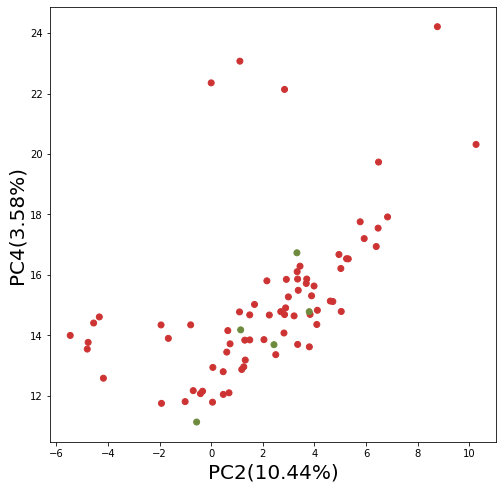

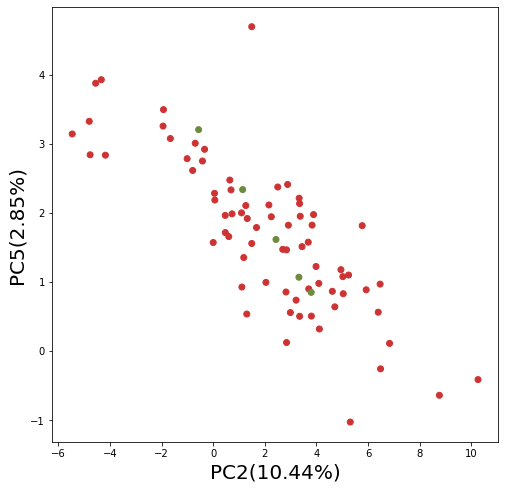

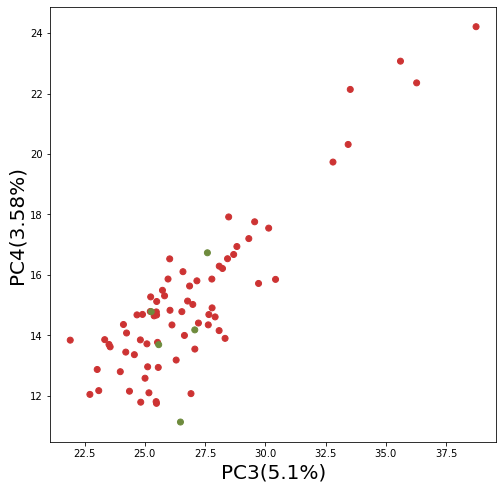

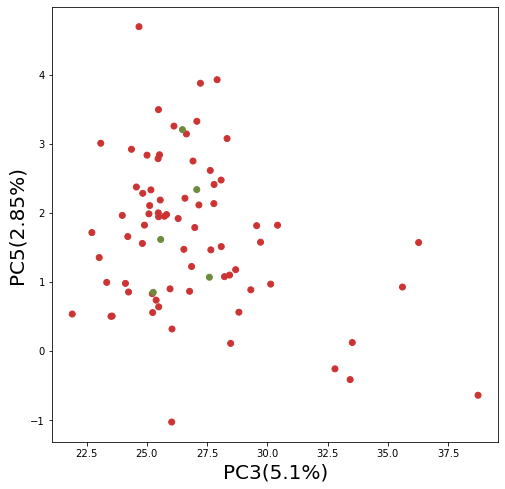

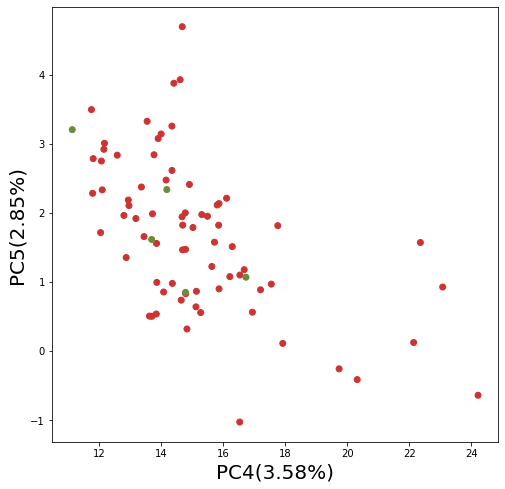

In [150]:
# Use the loadings from all feature PCA in training set to plot score plot of test set
transformed_test_matrix=np.matmul(loading_matrix,test_renamed)
test_matrix=pd.DataFrame()
for i in range(1,6):
    test_matrix['PC'+str(i)]=transformed_test_matrix.iloc[i-1,:]
targets = GBM_label_test
test_matrix['target']= targets
test_sort=test_matrix.sort_values('target',axis=0,ascending=True)
for i in range(0,len(test_sort.columns.values)-2):
        for j in range(i+1, len(test_sort.columns.values)-1):
            fig = plt.figure(figsize = (8,8))
            ax = fig.add_subplot(1,1,1) 
            ax.set_xlabel('PC'+str(i+1)+'('+str(round(explained_variance[i]*100,2))+'%)', fontsize = 20)
            ax.set_ylabel('PC'+str(j+1)+'('+str(round(explained_variance[j]*100,2))+'%)', fontsize = 20)
            color_list={0:'#6E8B3D',1:'#CD3333'}
            colors = [color_list[c] for c in targets]
            sc = ax.scatter(test_sort.loc[:,'PC'+str(i+1)], test_sort.loc[:,'PC'+str(j+1)], c=colors)
            plt.savefig('test_reduced'+str(i)+str(j)+'.jpg')
            plt.show()

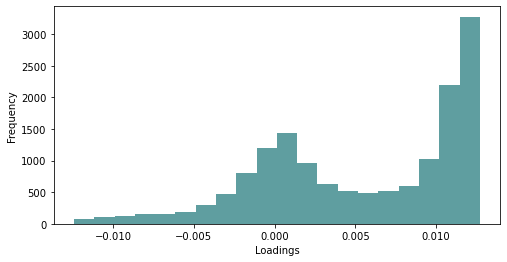

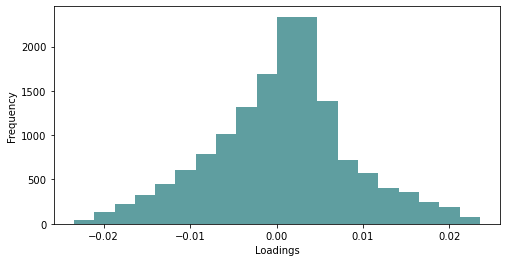

In [104]:
# Loadings of all features on PC1 and PC2
plt.figure(figsize=(8,4))
plt.hist(loading_matrix[0,:],color='#5F9EA0',bins=20)
plt.ylabel('Frequency')
plt.xlabel('Loadings')
plt.show()
plt.figure(figsize=(8,4))
plt.hist(loading_matrix[1,:],color='#5F9EA0',bins=20)
plt.ylabel('Frequency')
plt.xlabel('Loadings')
plt.show()

Ttest_indResult(statistic=-20.024065267806876, pvalue=1.3407304280890265e-72)

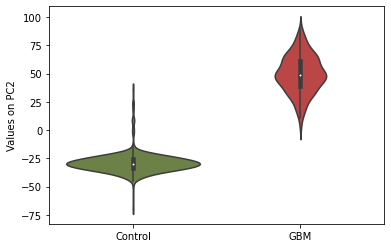

In [41]:
# Violin plot of PC values for GBM and control from all feature analysis
# t-test of difference
# Optional
principalDf2['target']=GBM_label2
ax = sns.violinplot(x='target', y='PC2',
                    data=principalDf2, palette=['#6E8B3D','#CD3333'])
ax.set_xticklabels(['Control','GBM'])
ax.set_xlabel('')
ax.set_ylabel('Values on PC2')
res = stats.ttest_ind(principalDf2['PC2'][0:295], principalDf2['PC2'][295:801], 
                      equal_var=True)

display(res)

In [23]:
# Lasso regression to eliminate features
def ElasticnetElim(a, x, y):
    clf = linear_model.Lasso(alpha=a)
    clf.fit(x,y)
    selected_feature=[]
    for i in range(0,len(clf.coef_)):
        if clf.coef_[i]!=0:
            selected_feature.append(x.columns.values[i])
    return(selected_feature)

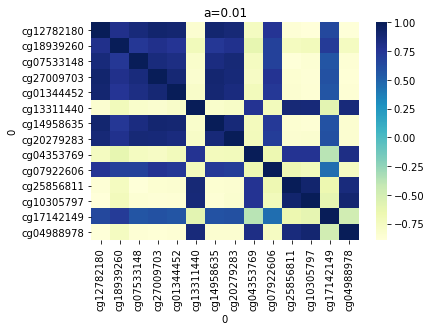

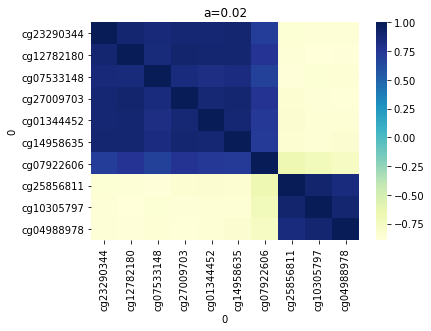

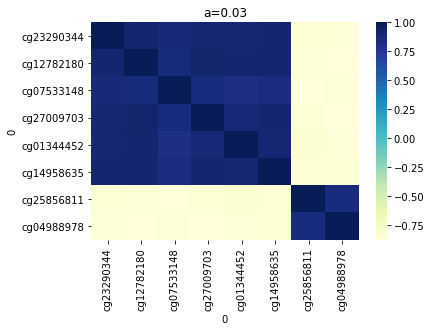

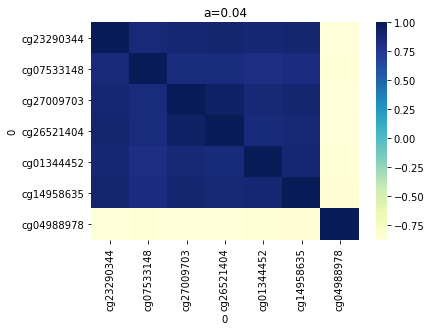

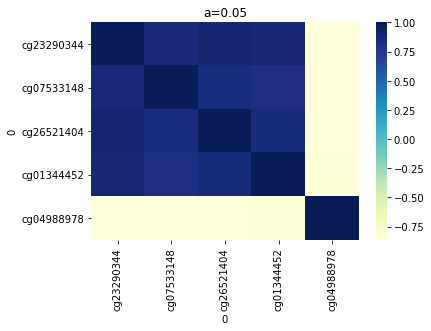

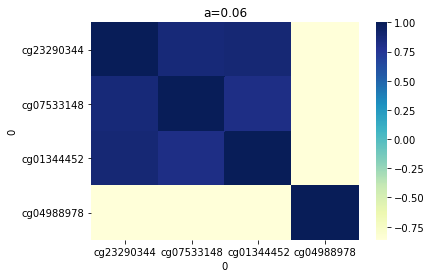

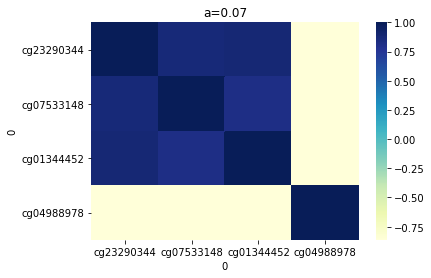

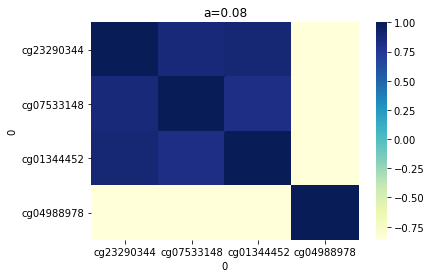

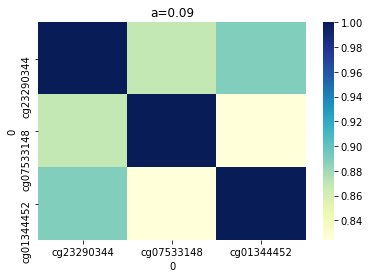

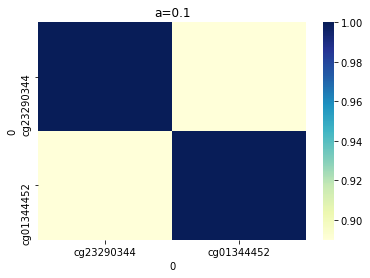

In [32]:
# Eliminate features using different a values
table_trans=total_table1.T
selected_feature_list=[]
for i in range(10):
    a=(i+1)/100
    selected_feature=ElasticnetElim(a,table_trans,GBM_label2)
    sns.heatmap(table_trans[selected_feature].corr(),cmap="YlGnBu")
    selected_feature_list=selected_feature_list+(selected_feature)
    plt.title('a='+str(a))
    plt.show()

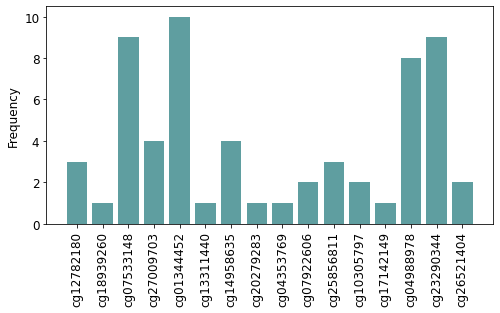

In [38]:
# Frequency of selected features from a grid search using multiple a values
counter=collections.Counter(selected_feature_list)
plt.figure(figsize=(8,4))
plt.bar(counter.keys(),counter.values(),color='#5F9EA0')
plt.ylabel('Frequency',size=12)
plt.xticks(rotation = 90,size=12)
plt.yticks(size=12)
plt.show()
selected_feature=[list(counter.keys())[i]  for i in range(0,len(counter)) if counter[list(counter.keys())[i]]>2]

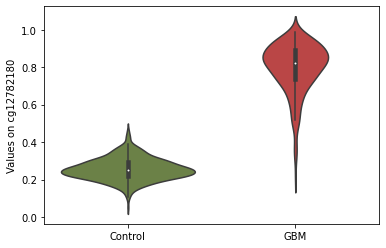

MannwhitneyuResult(statistic=30531.0, pvalue=1.3040298476653487e-44)

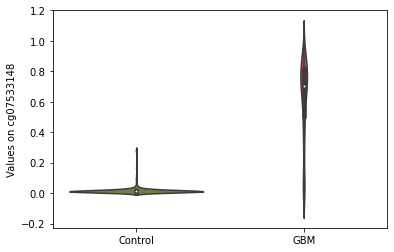

MannwhitneyuResult(statistic=23370.0, pvalue=1.5328773369546077e-59)

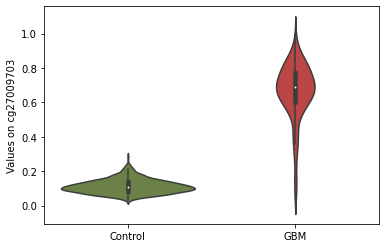

MannwhitneyuResult(statistic=22727.0, pvalue=5.446943282986631e-61)

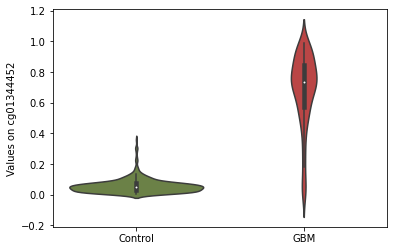

MannwhitneyuResult(statistic=25272.0, pvalue=2.33209677452472e-55)

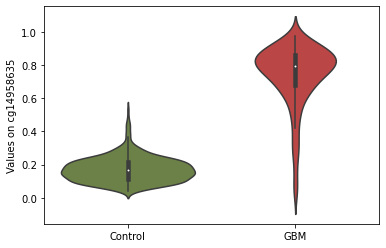

MannwhitneyuResult(statistic=31139.0, pvalue=1.907845777611515e-43)

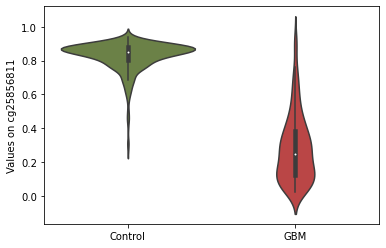

MannwhitneyuResult(statistic=44281.0, pvalue=3.625453641760985e-22)

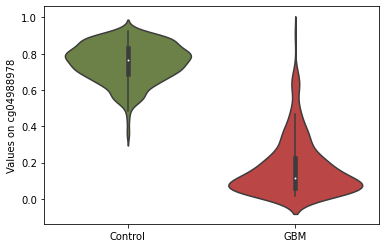

MannwhitneyuResult(statistic=17472.0, pvalue=1.655001090893275e-73)

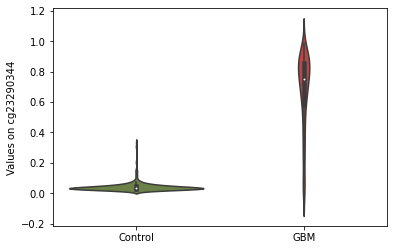

MannwhitneyuResult(statistic=23570.0, pvalue=4.292015115003311e-59)

In [146]:
# Violin plot of individual features 
for i in selected_feature:
    table_trans['target']=GBM_label2
    ax = sns.violinplot(x='target', y=i,
                        data=table_trans, palette=['#6E8B3D','#CD3333'])
    ax.set_xticklabels(['Control','GBM'])
    ax.set_xlabel('')
    ax.set_ylabel('Values on '+str(i))
    plt.savefig('test_'+str(i))
    plt.show()
    # Non parametric statistical test
    res = stats.mannwhitneyu(table_trans[i][0:295], table_trans[i][295:801])
    display(res)

In [39]:
# Features selected from Elastic net elimination where features occured more than 2 times in grid search
print(selected_feature)

['cg12782180', 'cg07533148', 'cg27009703', 'cg01344452', 'cg14958635', 'cg25856811', 'cg04988978', 'cg23290344']


8


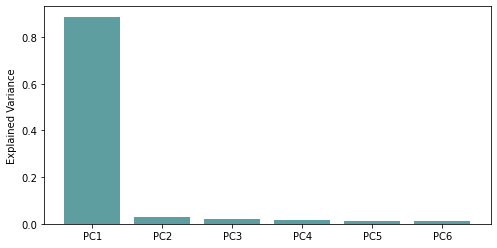

<ipython-input-19-c79db5d8a646>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  principalDf_trimmed['target']=np.array(result)


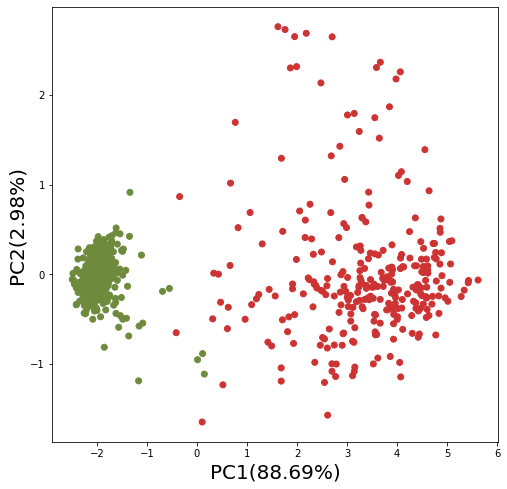

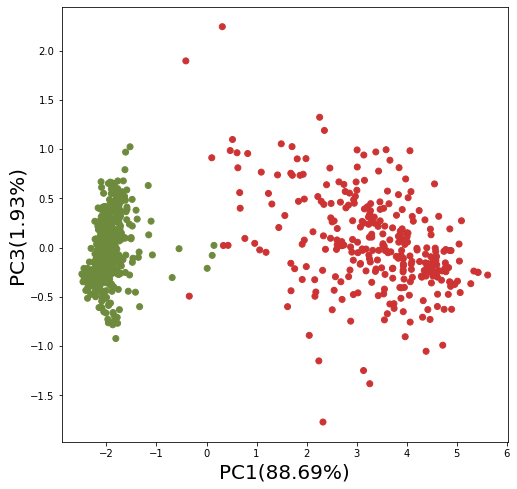

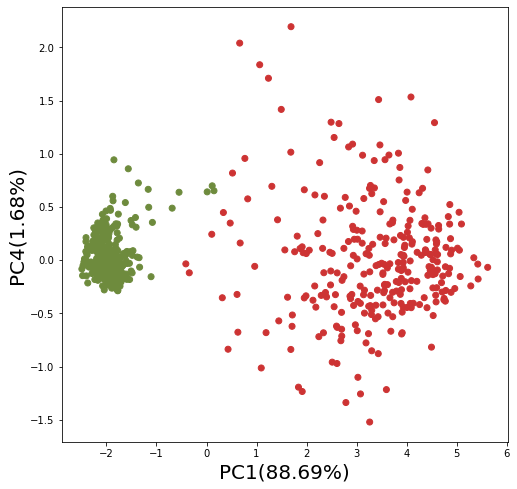

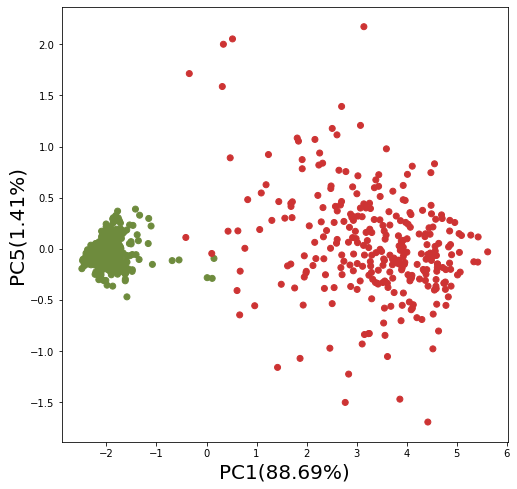

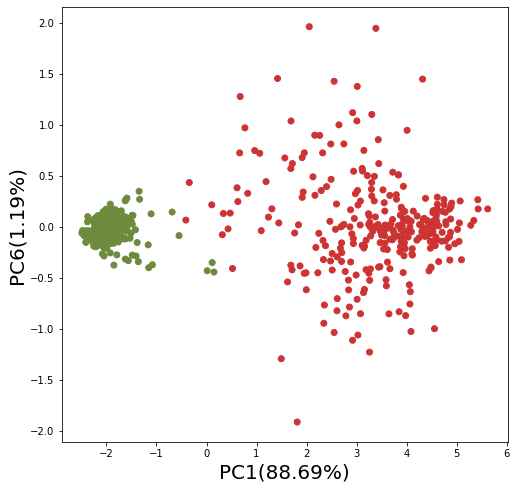

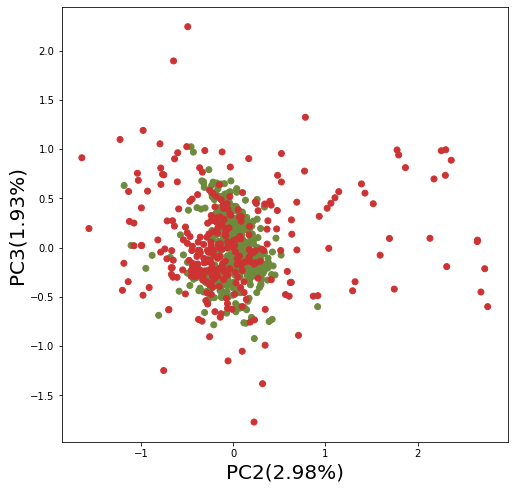

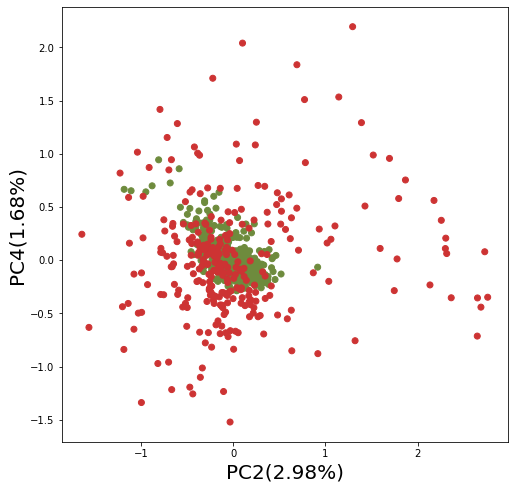

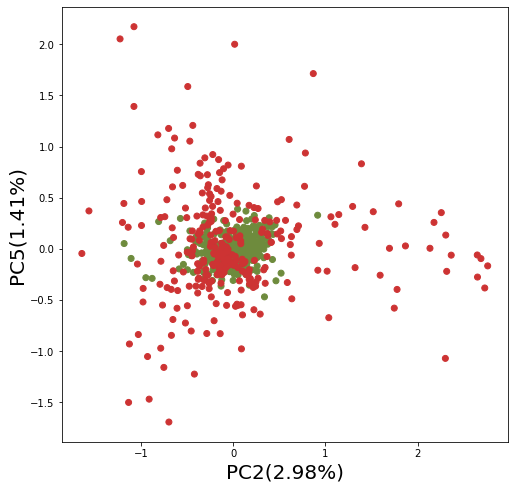

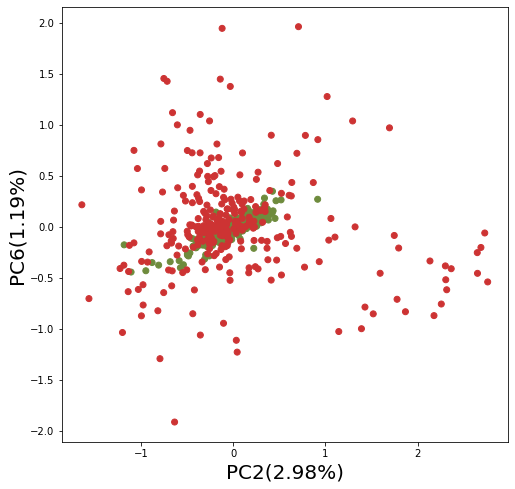

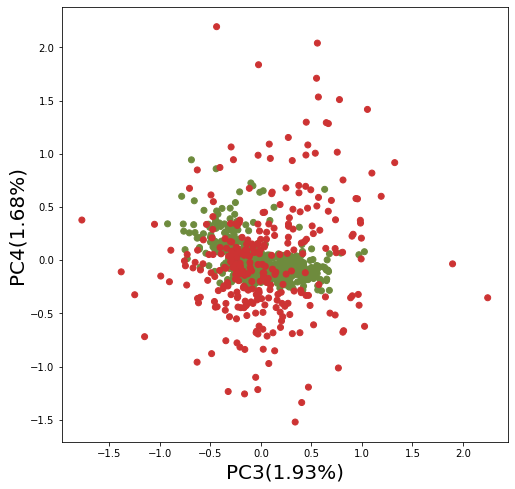

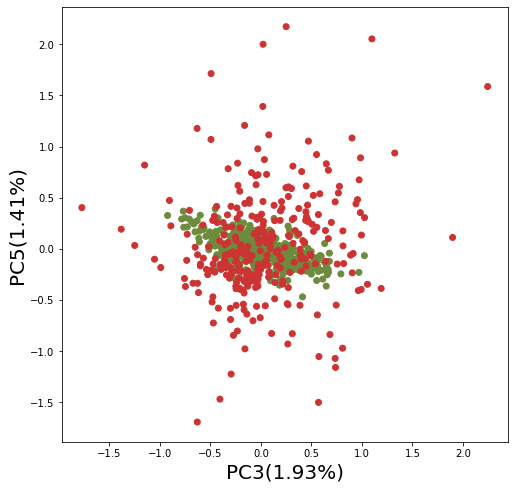

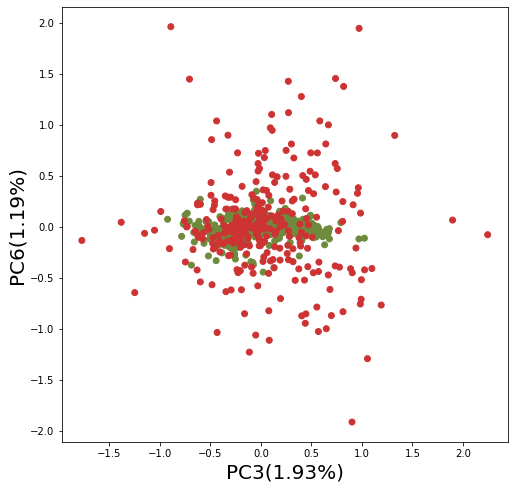

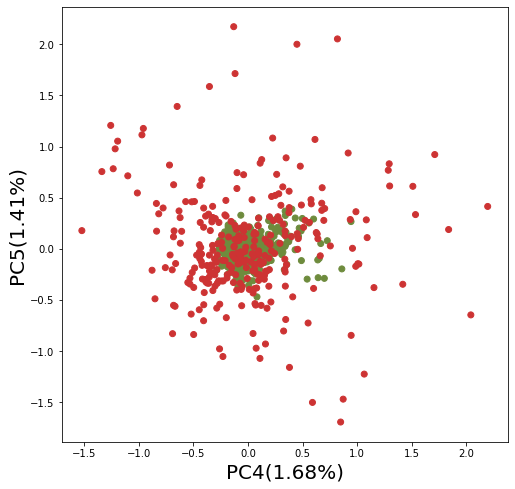

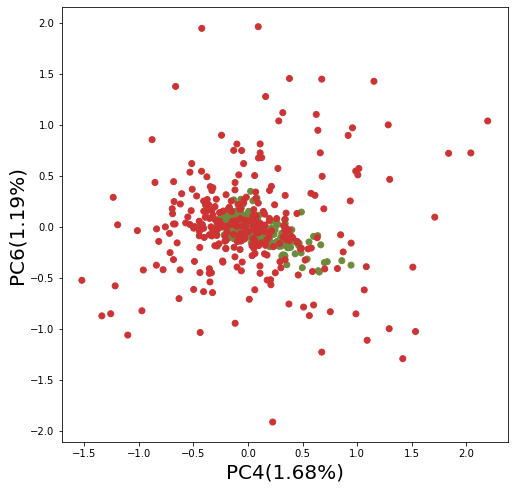

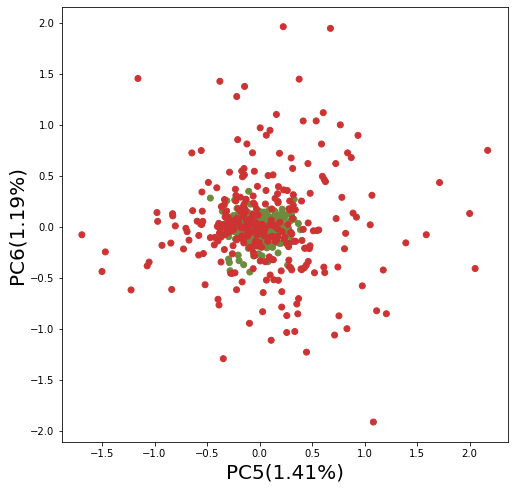

In [136]:
# Run PCA analysis on selected features in the training dataset
[principalDf3, loading_matrix2,explained_variance2]=PCAanalysis(table_trans[selected_feature])
PCAmasterrun(principalDf3, loading_matrix2,explained_variance2,table_trans[selected_feature],GBM_label2)

In [57]:
# Loading matrix from selected feature PCA
loading_PC=pd.DataFrame(loading_matrix2,index=None, columns=table_trans[selected_feature].columns[:len(table_trans[selected_feature].columns)])


0    0.360555
1    0.179096
2    0.037910
3    0.002042
4    0.142434
5   -0.010311
6    0.450927
7    0.782786
Name: cg12782180, dtype: float64


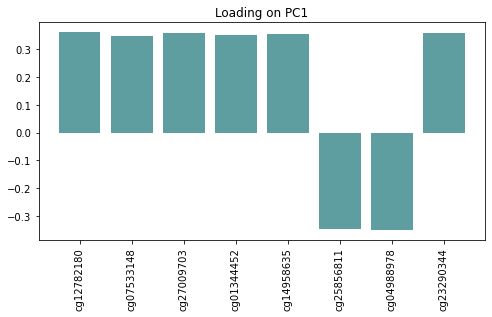

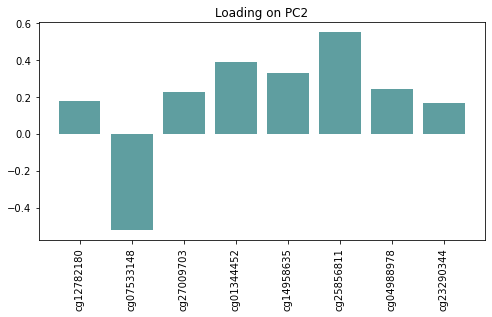

In [58]:
#Feature loadings on PC1 and PC2
plt.figure(figsize=(8,4))
plt.bar(loading_PC.columns.values,loading_PC.iloc[0,:],color='#5F9EA0')
print(loading_PC.iloc[:,0])
plt.xticks(rotation = 90)
plt.title('Loading on PC1')
plt.show()
plt.figure(figsize=(8,4))
plt.bar(loading_PC.columns.values,loading_PC.iloc[1,:],color='#5F9EA0')
plt.xticks(rotation = 90)
plt.title('Loading on PC2')
plt.show()

In [143]:
# Support vector machine to separate data
# Out_train and Out_test are from the test dataset (not invovled in training or picking selected feature)
def linearsvm(x,y,fold,out_train,out_test,selected_feature):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/fold, random_state=0)
    model = svm.SVC(kernel="linear", probability=True)
    model.fit(X_train, y_train)
#     print(clf.predict(X_test))
    print(model.score(X_test,y_test))
    decision_scores = model.decision_function(X_test)
    fpr, tpr, thres = roc_curve(y_test, decision_scores)
    preds = model.predict(X_test)
    print('AUC: {:.3f}'.format(metrics.roc_auc_score(y_test, preds)))
    print("accuracy: ", metrics.accuracy_score(y_test, preds))
    print("precision: ", metrics.precision_score(y_test, preds)) 
    print("recall: ", metrics.recall_score(y_test, preds))
    print("f1: ", metrics.f1_score(y_test, preds))
    # roc curve
    plt.plot(fpr, tpr, '#5F9EA0', label='Linear SVM')
    plt.plot([0,1],[0,1], "k--", label='Random Guess')
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()
    # Get the model parameters
    print('Coefficients of the SVM model')
    print(model.coef_)
    plt.bar(selected_feature,model.coef_[0],color='#5F9EA0')
    plt.xticks(rotation = 90)
    plt.show()
    print('Out of dataset prediction')
    print(model.score(out_train,out_test))
    decision_scores = model.decision_function(out_train)
    fpr, tpr, thres = roc_curve(out_test, decision_scores)
    preds = model.predict(out_train)
    print(preds)
    print('AUC: {:.3f}'.format(metrics.roc_auc_score(out_test, preds)))
    print("accuracy: ", metrics.accuracy_score(out_test, preds))
    print("precision: ", metrics.precision_score(out_test, preds)) 
    print("recall: ", metrics.recall_score(out_test, preds))
    print("f1: ", metrics.f1_score(out_test, preds))
    # roc curve
    plt.plot(fpr, tpr, '#5F9EA0', label='Linear SVM')
    plt.plot([0,1],[0,1], "k--", label='Random Guess')
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()
    return(model)

1.0
AUC: 1.000
accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0


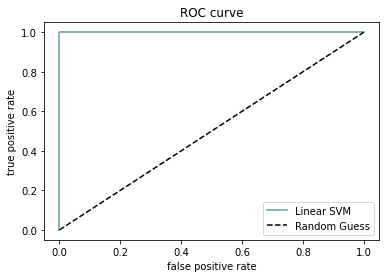

Coefficients of the SVM model
[[ 1.30373213  0.73856607  1.90719481  1.12469034  0.68185064 -0.17719487
  -1.61460658  0.12674895]]


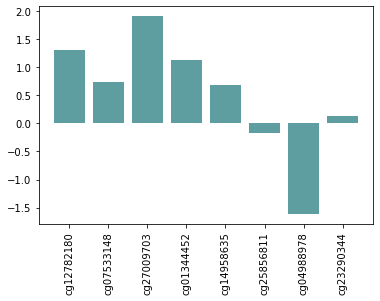

Out of dataset prediction
0.987012987012987
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 1]
AUC: 0.993
accuracy:  0.987012987012987
precision:  1.0
recall:  0.9861111111111112
f1:  0.993006993006993


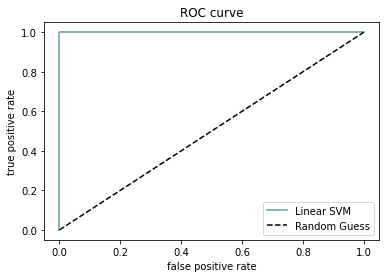

In [144]:
# Perform SVM on training set and use cross validation/out of dataset samples (testing data) for prediction
test_table_trans=test_renamed.T
model=linearsvm(table_trans[selected_feature],table_trans['target'],5,test_table_trans[selected_feature],GBM_label_test,selected_feature)